In [2]:
import math
import statistics
import numpy as np
import scipy.stats 
import pandas as pd
import matplotlib.pyplot as plt

# Веројатност на петка или глава

In [3]:
x = 7,       # петки
size = 10,   # вкупно фрлања
prob = 0.5   # шансата за петка или глава на фер паричка

scipy.stats.binom.pmf(x, size, prob)


array([0.1171875])

In [4]:
x = 5,       # петки
size = 10,   # вкупно фрлања
prob = 0.5   # шансата за петка или глава на фер паричка

scipy.stats.binom.pmf(x, size, prob)

array([0.24609375])

# Процена со решетка

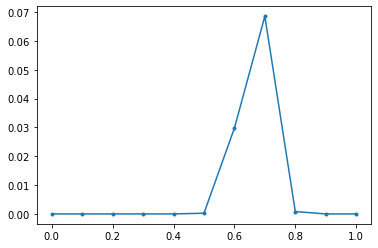

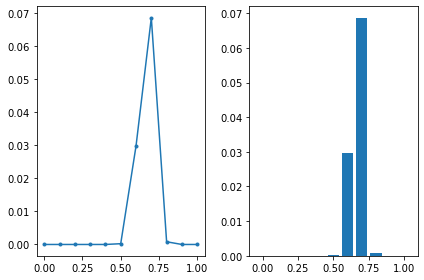

In [5]:
# вредности на параметарот кои сакаме да ги евалуираме
reshetka = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# повторување на пресметувањето за секој од можните вредности на параметарот
vozmoznost = []
for i in range(0, len(reshetka)):
    vozmoznost.append(scipy.stats.binom.pmf(67, 100, reshetka[i]))

# конвертирај ги листите во np.array
reshetka = np.array(reshetka)
vozmoznost = np.array(vozmoznost)


# сега правиме графикон од резултатите
plt.plot(reshetka, vozmoznost, marker='.')
#plt.bar(reshetka, vozmoznost, width=.08)
#plt.gca().set(xticks=reshetka, xlim=(0, 1))
plt.show

fig, axes = plt.subplots(1, 2)
axes[0].plot(reshetka, vozmoznost, marker='.')
axes[1].bar(reshetka, vozmoznost, width=.08)
fig.tight_layout()

# Баесово ажурирање

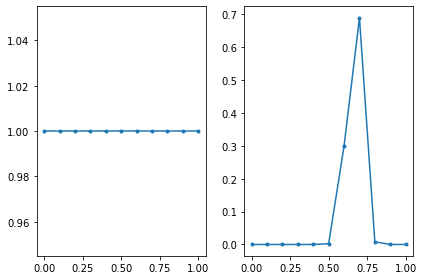

In [6]:
prethodni_verojatnosti = np.repeat(1, len(reshetka))
posteriorni_verojatnosti = prethodni_verojatnosti * vozmoznost
posteriorni_verojatnosti = posteriorni_verojatnosti / sum(posteriorni_verojatnosti)


fig, axes = plt.subplots(1, 2)
axes[0].plot(reshetka, prethodni_verojatnosti, marker='.')
axes[1].plot(reshetka, posteriorni_verojatnosti, marker='.')
fig.tight_layout()

In [7]:
max(posteriorni_verojatnosti)

0.6899807280766883

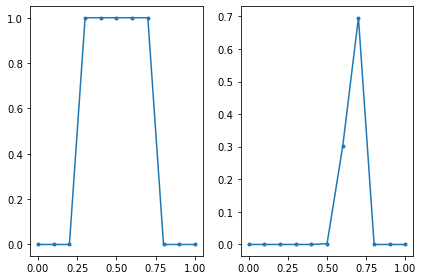

In [8]:
prethodni_verojatnosti = np.array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0])
posteriorni_verojatnosti = prethodni_verojatnosti * vozmoznost
posteriorni_verojatnosti = posteriorni_verojatnosti / sum(posteriorni_verojatnosti)


fig, axes = plt.subplots(1, 2)
axes[0].plot(reshetka, prethodni_verojatnosti, marker='.')
axes[1].plot(reshetka, posteriorni_verojatnosti, marker='.')
fig.tight_layout()

In [9]:
max(posteriorni_verojatnosti)

0.6956783613104962

# Примероци од постериорната дистрибуција

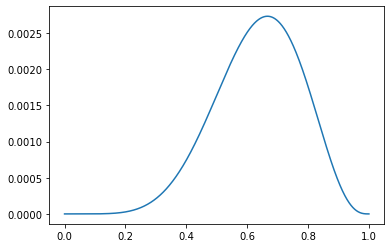

In [10]:
# Креираме вектор можни вредности на параметарот за проценка со решетка
# Сакаме да ја најдеме вредноста која ја максимизира можноста
p_grid = np.linspace(0, 1, num = 1000)

# Користиме униформна приорна дистрибуција
# Вектор со илјада единици за секој елемент на мрежата
prior = np.repeat(1, 1000)

likelihood = scipy.stats.binom.pmf(6, 9,  p_grid ) # 6 W; 3 L

posterior = likelihood * prior 
# Стандардизираме
posterior = posterior / sum(posterior) 




fig, axes = plt.subplots(1, 1)
axes.plot(p_grid, posterior)



In [11]:
samples = np.random.choice( p_grid,  # можните вредности на параметарот
                   size = int(1e4),  # колку вредности да извлечеме (мора int() бидејќи 1e4 по default е float)
                   replace = True,   # со замена 
                   p = posterior     # веројантоста со која секоја вредност ќе биде извлечена
                   )



(array([   4.,   48.,  273.,  682., 1291., 2117., 2316., 2024., 1047.,
         198.]),
 array([0.0970971 , 0.18458458, 0.27207207, 0.35955956, 0.44704705,
        0.53453453, 0.62202202, 0.70950951, 0.796997  , 0.88448448,
        0.97197197]),
 <a list of 10 Patch objects>)

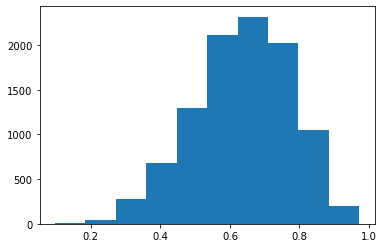

In [12]:
fig, axes = plt.subplots(1, 1)
axes.hist(samples)